# Importing Libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


# Load Dataset

In [2]:
base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
base_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# checking attributes of data

In [5]:
base_data.shape

(7043, 21)

In [6]:
base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#checking datatypes of columns
base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Exploring numeric and categorical data

In [8]:
#check the descriptive statistics of numerical features
base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Seniorcitizen is categorical hence 25% 50% 75% distribution is not proper
75% of customers have tenure less than 55 months
Avg monthly charges is USD 64.76 

when we deal with classification probems we focus more on characteristics of target variable
also we try to get insights from our features w.r.t target variables

Here ist we will find the ratio of churners vs non churners


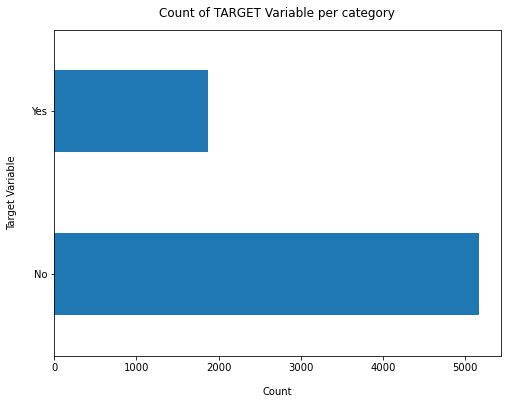

In [9]:
base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
100*base_data['Churn'].value_counts()/len(base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values 
separately to get some insights.

In [12]:
base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\Scodes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


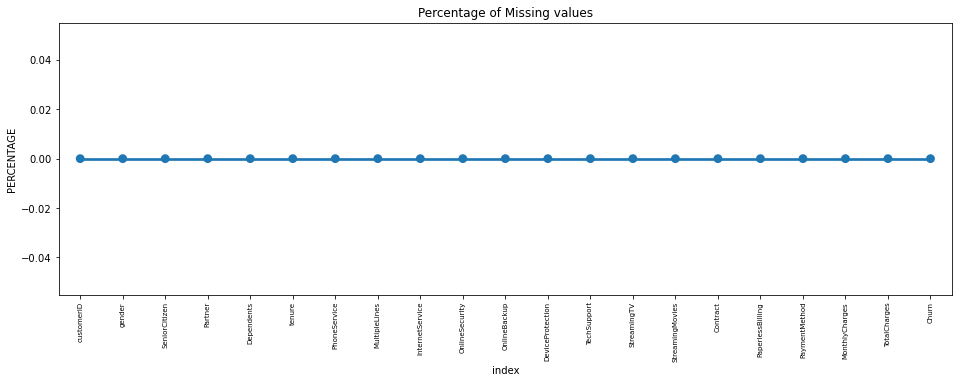

In [13]:
#Checking missing values
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

All variables have zero missing values

In [14]:
base_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here,

for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning

  Create a copy of base data for manupulation & processing

In [15]:
copy_bd = base_data.copy()

Total Charges should be numeric amount. Let's convert it to numerical data type

In [16]:
copy_bd.TotalCharges = pd.to_numeric(copy_bd.TotalCharges, errors='coerce')
copy_bd.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 11 missing values are in totalcharges.Lets check these values

In [17]:
#shows records where null values are true
copy_bd.loc[copy_bd ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Missing value Treatment
since the % of these record is very low ie 0.15 % [11 / 7043 * 100]. 
Its safe to ignore them
or
we can also fill it with zero

In [18]:
#removing missing values
print(copy_bd.shape)
copy_bd.dropna(how = 'any', inplace = True)
#for filing values
#df.fillna(0)

(7043, 21)


In [19]:
copy_bd.shape

(7032, 21)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [20]:
#get max tenure
print(copy_bd['tenure'].max())

72


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

copy_bd['tenure_group'] = pd.cut(copy_bd.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
copy_bd['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

# Remove Unwanted columns

In [23]:
#Dropping customerID and tenure
copy_bd.drop(columns = ['customerID','tenure'], axis=1 ,inplace= True)


In [24]:
copy_bd.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration
EDA STARTS FROM HERE

*1. plot  distributions on individual features by churn*


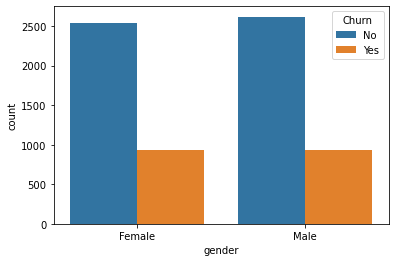

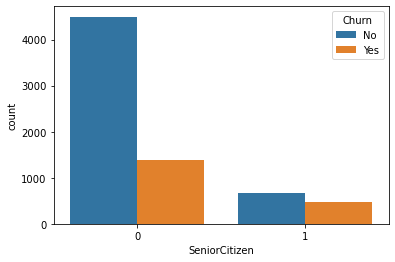

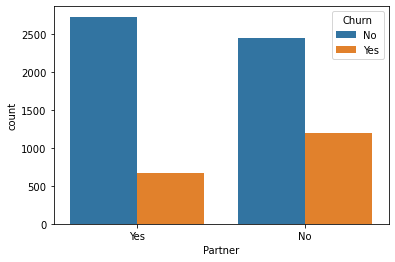

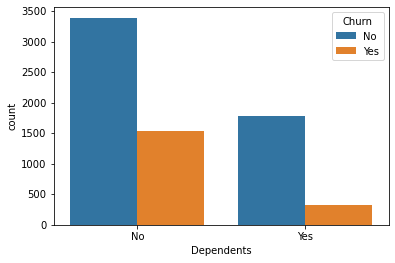

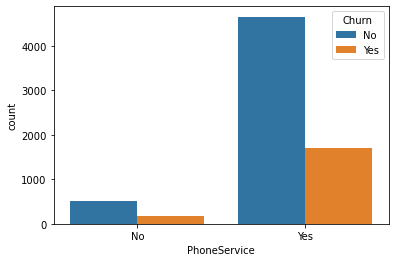

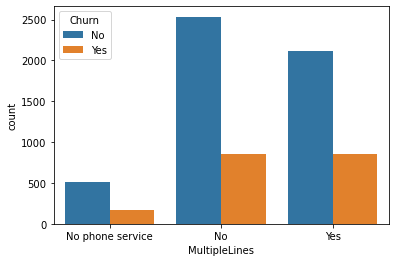

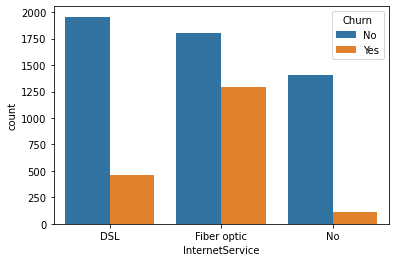

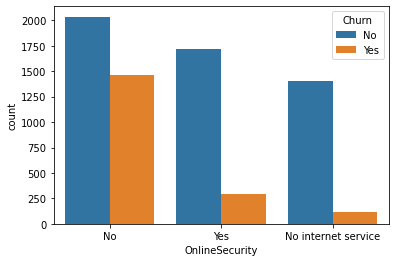

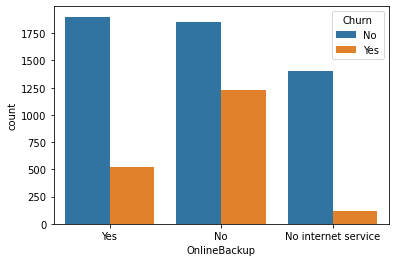

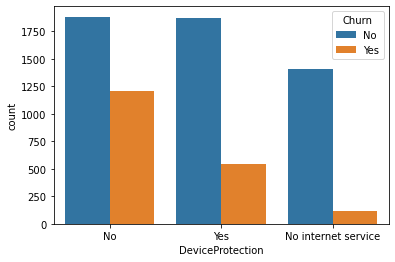

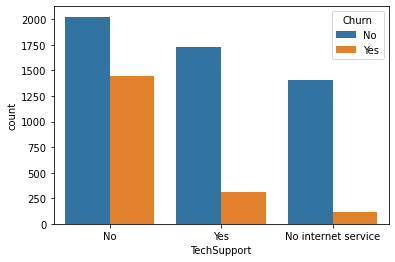

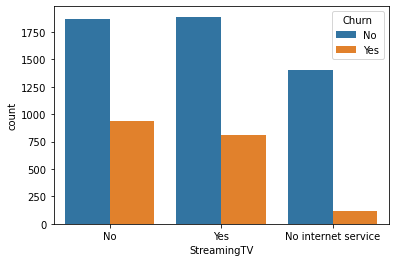

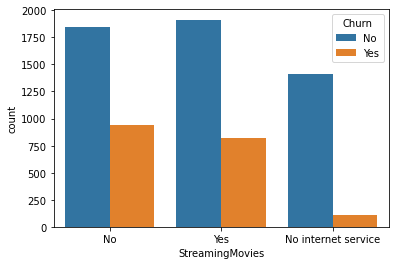

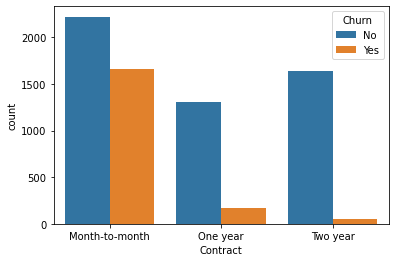

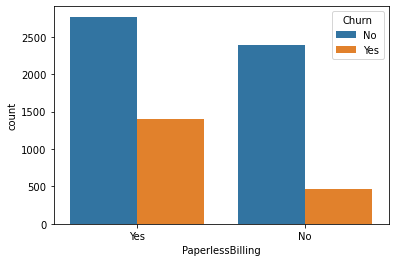

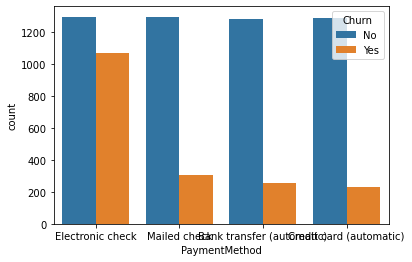

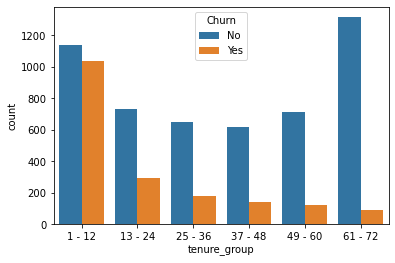

In [25]:
for i, predictor in enumerate(copy_bd.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=copy_bd, x=predictor, hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [26]:
copy_bd['Churn'] = np.where(copy_bd.Churn == 'Yes',1,0)

In [27]:
copy_bd.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [28]:
#convert all cat var into dummy var

copy_bd_dummies = pd.get_dummies(copy_bd)
copy_bd_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


now we will find relationship between monthly charges and total charges

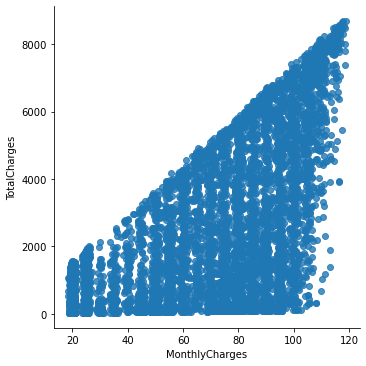

In [29]:
sns.lmplot(data=copy_bd_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by Churn')

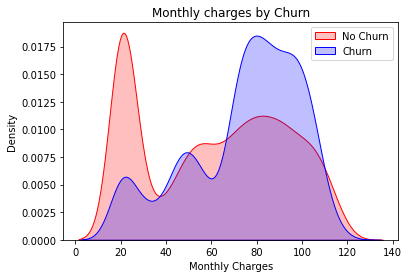

In [30]:
Mth = sns.kdeplot(copy_bd_dummies.MonthlyCharges[(copy_bd_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(copy_bd_dummies.MonthlyCharges[(copy_bd_dummies["Churn"] == 1) ],
                ax =Mth , color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by Churn')

Text(0.5, 1.0, 'Total charges by churn')

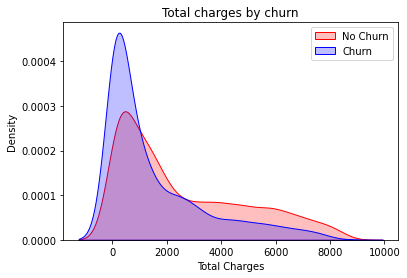

In [31]:
Tot = sns.kdeplot(copy_bd_dummies.TotalCharges[(copy_bd_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_bd_dummies.TotalCharges[(copy_bd_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

 Build a corelation of all predictors with 'Churn

<AxesSubplot:>

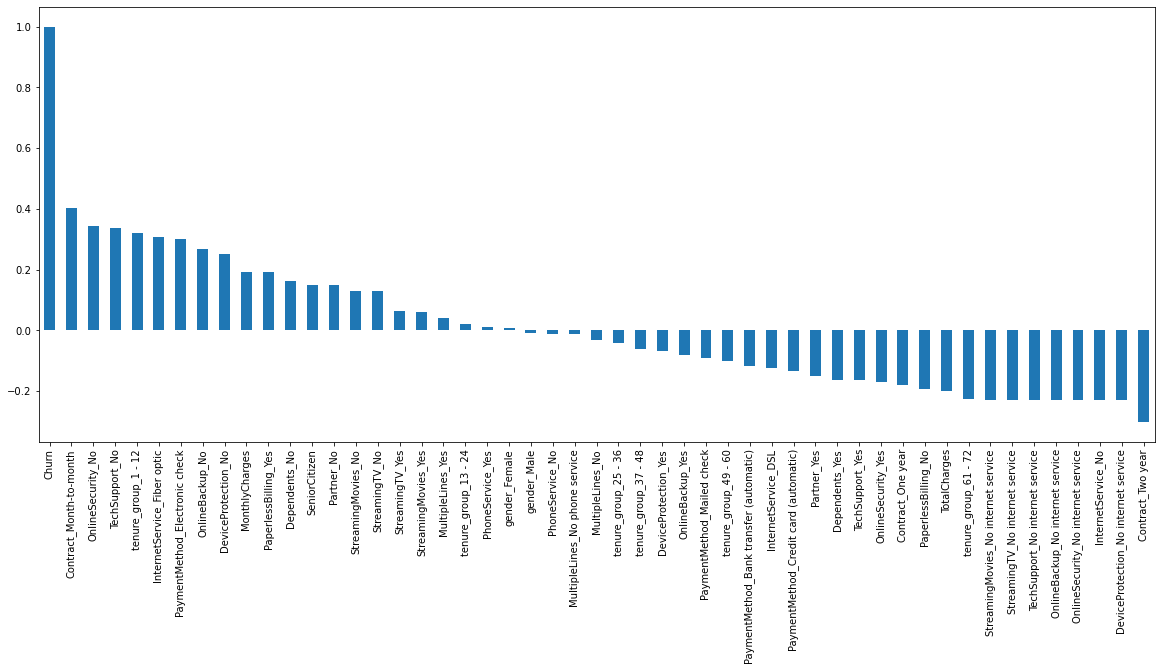

In [32]:
plt.figure(figsize=(20,8))
copy_bd_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


Derived Insight:

 **HIGH Churn** seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

**LOW Churn** is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<AxesSubplot:>

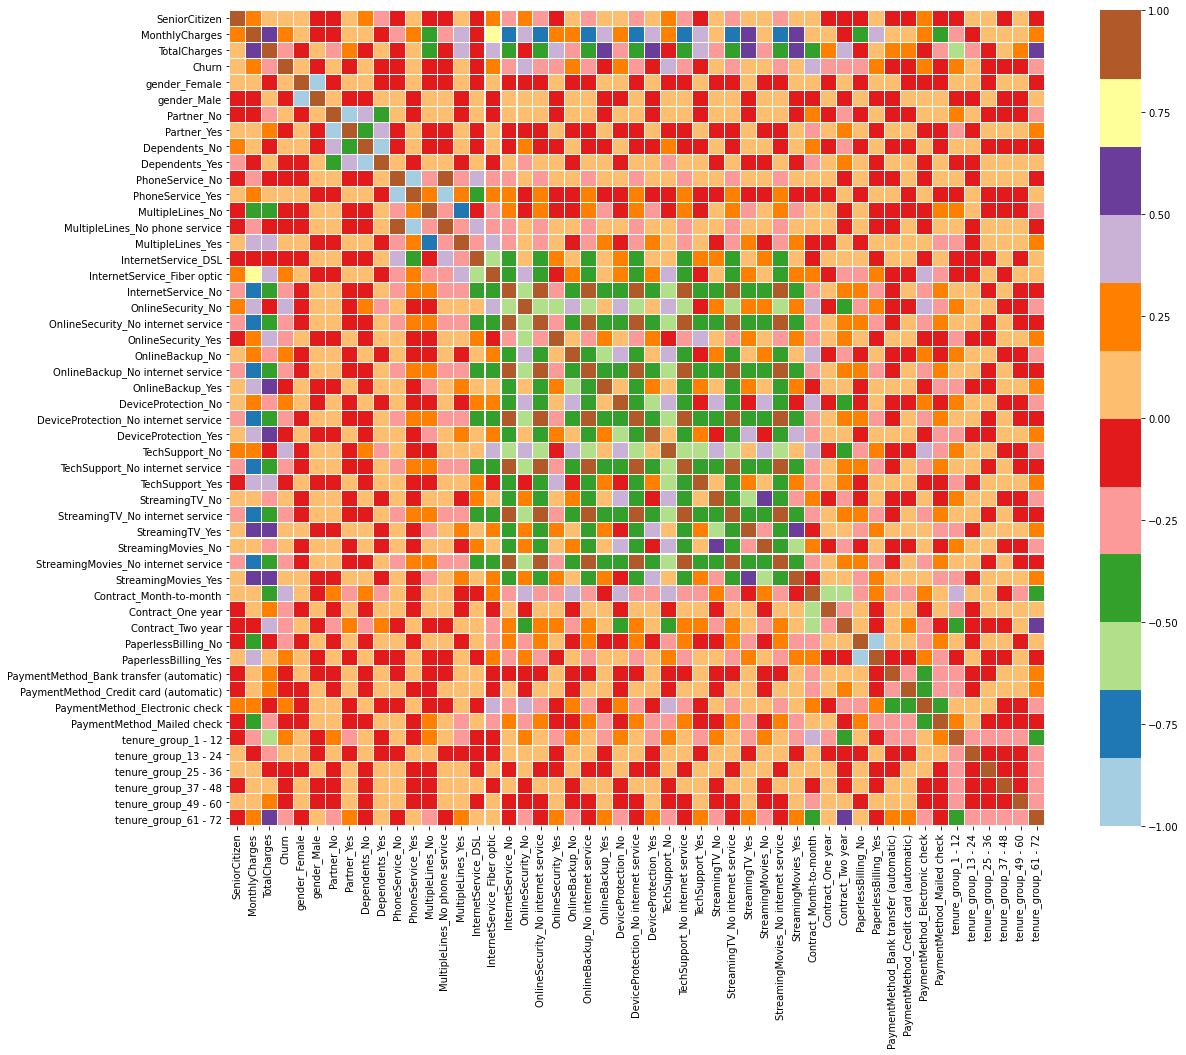

In [33]:
plt.figure(figsize=(20,15))

sns.heatmap(copy_bd_dummies.corr(), cmap="Paired",square = True,linewidths=0.05)

# Bivariate Analysis

In [34]:
#created two dataframes[non-churners,churners]
new_df1_target0=copy_bd.loc[copy_bd["Churn"]==0]
new_df1_target1=copy_bd.loc[copy_bd["Churn"]==1]

In [35]:
copy_bd.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [36]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

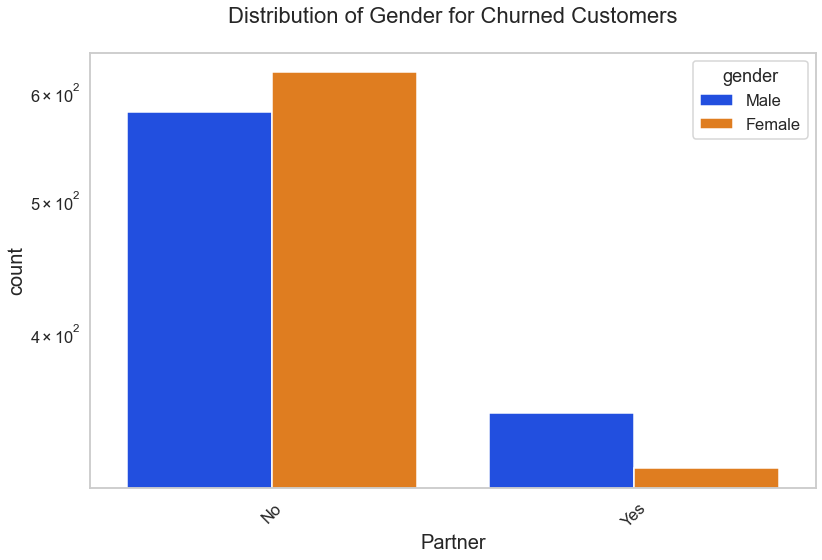

In [37]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

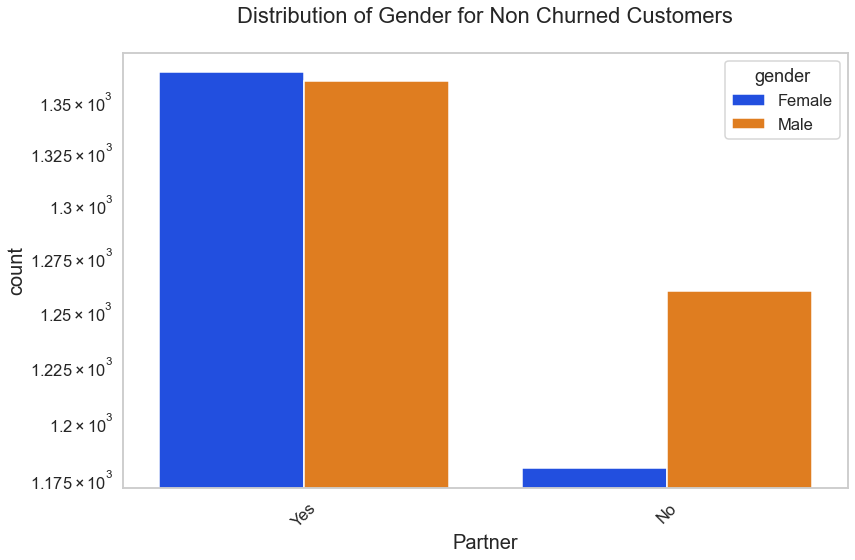

In [38]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

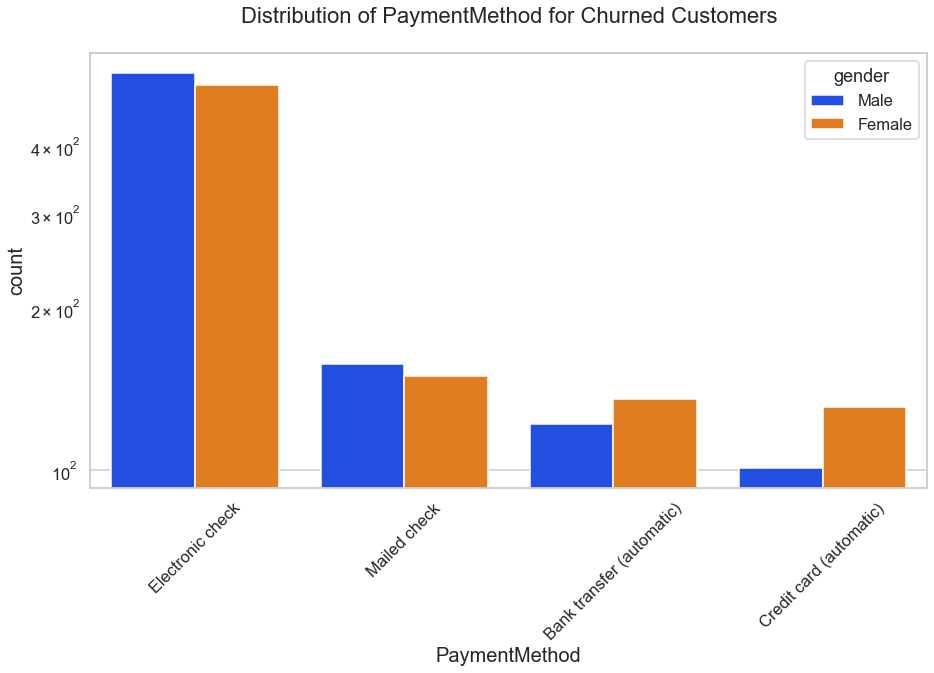

In [39]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

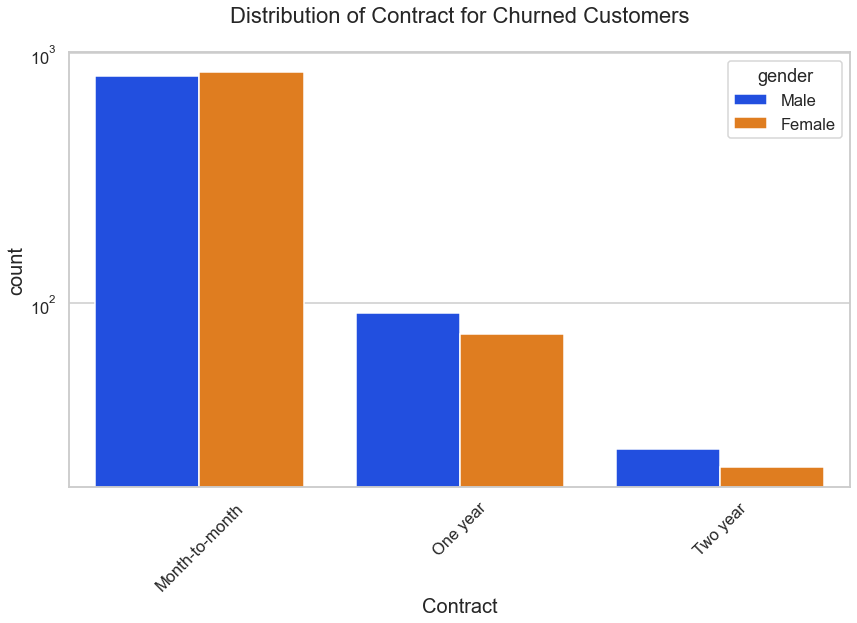

In [40]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

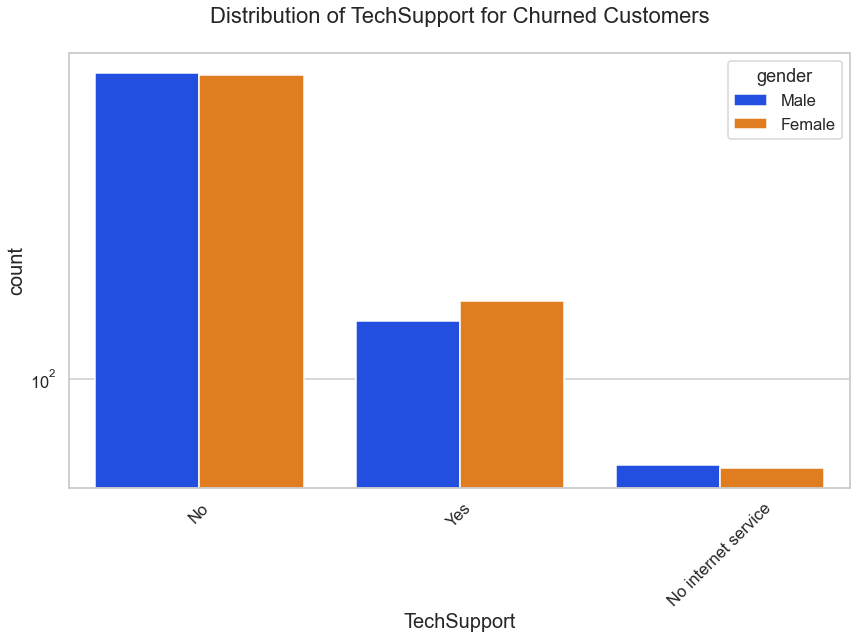

In [41]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

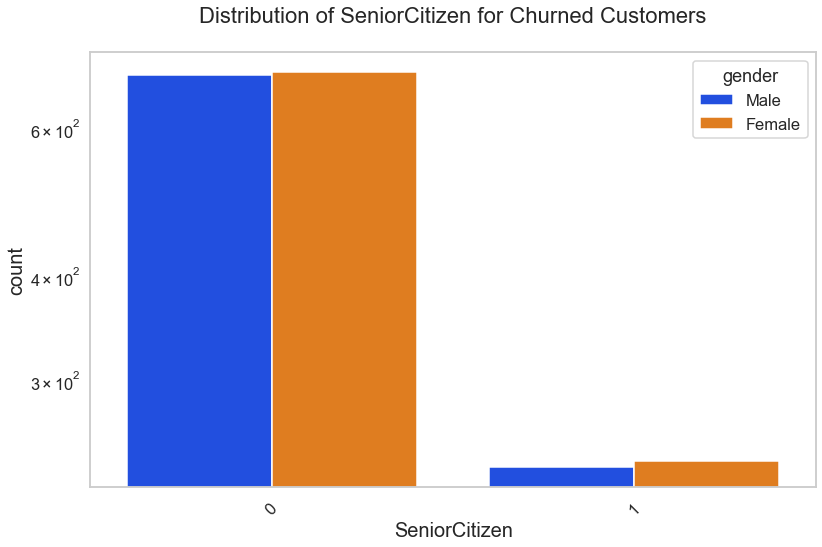

In [42]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners

Non senior Citizens are high churners


In [43]:
#Converting dummy data into csv file for model building
copy_bd_dummies.to_csv('tel_churn.csv')

# Normalization

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [45]:
StandardScaler = StandardScaler()
columns_to_scale=['MonthlyCharges','TotalCharges']
copy_bd_dummies[columns_to_scale] = StandardScaler.fit_transform(copy_bd_dummies[columns_to_scale])

In [46]:
df=copy_bd_dummies
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,-1.161694,-0.994194,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,-0.260878,-0.173740,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,-0.363923,-0.959649,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,-0.747850,-0.195248,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0.196178,-0.940457,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.664868,-0.129180,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,1.276493,2.241056,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,-1.170004,-0.854514,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,0.319168,-0.872095,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


# MODELLING


In [47]:
#importing libaraies
import pandas as pd
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# feature Selection

In [48]:
#creating X and Y var[x=independent,y=dependent]
x = df.drop('Churn',axis=1)

In [49]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

**TRAIN TEST SPLIT**


In [50]:
# defines Training set and Testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (5625, 50) (5625,)
Test set: (1407, 50) (1407,)


In [51]:
accuracy_list = []
algorithm = []
predict_list = []

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_train=neigh.predict(x_train)
    yhat_test=neigh.predict(x_test)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(y_test, yhat_test) 
    std_acc[n-1]=np.std(yhat_test==y_test)/np.sqrt(yhat_test.shape[0])

accuracy_list.append(neigh.score(x_test,y_test))
algorithm.append("K Nearest Neighbours")
print("Training accuracy", np.round(mean_acc_train,3))
print("Testing accuracy", np.round(mean_acc_test,3))


Training accuracy [0.997 0.866 0.867 0.847 0.846 0.833 0.83  0.829 0.823]
Testing accuracy [0.733 0.756 0.746 0.76  0.751 0.763 0.759 0.763 0.767]


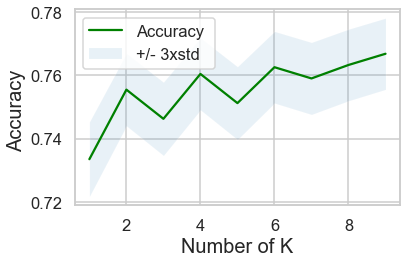

In [53]:
plt.plot(range(1,Ks),mean_acc_test,'g')
plt.fill_between(range(1,Ks),mean_acc_test - 1 * std_acc,mean_acc_test + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy value is", np.round(mean_acc_test.max(),3), "with k=", mean_acc_test.argmax()+1) 

The best accuracy value is 0.767 with k= 9


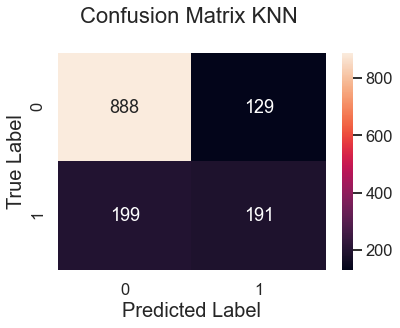

In [55]:
# use the best k
k = 8

# predict  
yhat = neigh.predict(x_test)

# matrix confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,yhat)
predict_list.append(cm_knn.item(0)+cm_knn.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_knn, annot = True, fmt='.0f', ax = ax)
plt.title('Confusion Matrix KNN ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1017
           1       0.60      0.49      0.54       390

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



# DECISION TREE


In [57]:
# Instantiate a DecisionTreeClassifier 'model dt' with a maximum depth of 6 set 'gini' as the information criterion
model_dt = DecisionTreeClassifier(criterion = 'gini',random_state = 100,max_depth=6, min_samples_leaf=8)

In [58]:
#fit you model
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [59]:
#Create predict variable
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [60]:
accuracy_list.append(model_dt.score(x_test,y_test))


In [61]:
algorithm.append("Decision Tree")
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1017
           1       0.64      0.54      0.58       390

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

# predict
yhat_test = LR.predict(x_test)

In [63]:
# probability of the predict
yhat_prob = LR.predict_proba(x_test)
yhat_prob
accuracy_list.append(LR.score(x_test,y_test))
algorithm.append("Logistic Regression")

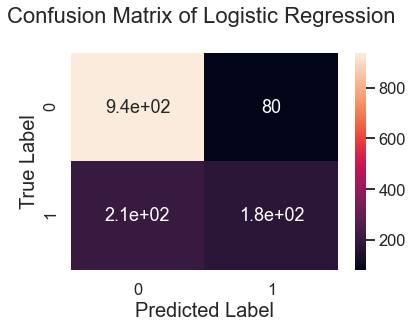

In [64]:
# matrix confusion
cm_logreg = confusion_matrix(y_test,yhat_test)
predict_list.append(cm_logreg.item(0)+cm_logreg.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_logreg, annot = True)
plt.title('Confusion Matrix of Logistic Regression ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
from sklearn.metrics import accuracy_score

mylist = []
ac_train = accuracy_score(y_train, yhat_train)
ac_test = accuracy_score(y_test, yhat_test)
mylist.append(ac_train)
mylist.append(ac_test)
print('Accuracy training:', np.round(ac_train,3))
print('Accuracy testing:', np.round(ac_test,3))

Accuracy training: 0.823
Accuracy testing: 0.794


In [66]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1017
           1       0.69      0.46      0.55       390

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [67]:
y_train

335     1
4297    0
3795    0
1113    1
2992    0
       ..
4153    0
1526    0
6145    0
3771    1
2193    0
Name: Churn, Length: 5625, dtype: int32

For Logistic Regression model,we get an accuracy of 0.8

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)
accuracy_list.append(model_rf.score(x_test,y_test))

algorithm.append('Random forest')

In [70]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1017
           1       0.70      0.43      0.53       390

    accuracy                           0.79      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



# NAIVE BAYES

test accuracy:  0.7142857142857143


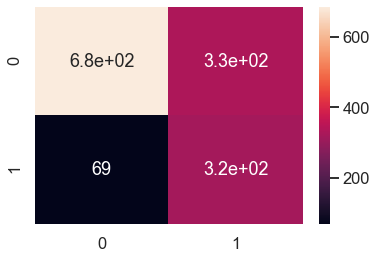

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test accuracy: ",nb.score(x_test,y_test))
accuracy_list.append(nb.score(x_test,y_test))
algorithm.append("Naive Bayes ")

cm_NaB = confusion_matrix(y_test,nb.predict(x_test))
predict_list.append(cm_NaB.item(0)+cm_NaB.item(2))
sns.heatmap(cm_NaB,annot=True)
plt.show()

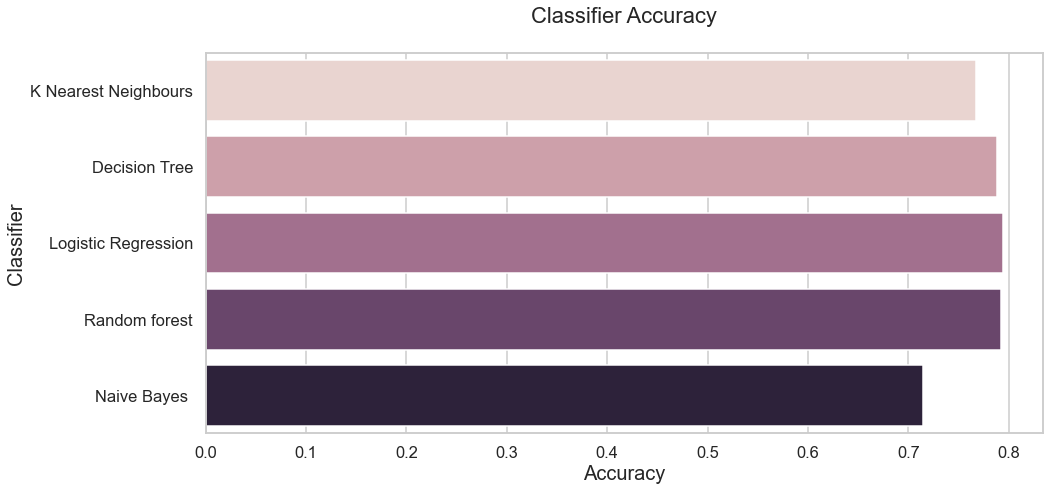

In [72]:
#Classifier Accuracy
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy_list,y=algorithm,palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling[Upsampling or Oversampling refers to the technique to create artificial or duplicate data points or of the minority class sample to balance the class label.] + ENN)
refer link : https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f

In [91]:
accuracy_list_s = []
algorithm_s = []
predict_list_s = []

In [92]:
from imblearn.combine import SMOTEENN

In [93]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


# Knn

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xr_train,yr_train)
    yhat_train=neigh.predict(xr_train)
    yhat_test=neigh.predict(xr_test)
    mean_acc_train[n-1] = metrics.accuracy_score(yr_train, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(yr_test, yhat_test) 
    std_acc[n-1]=np.std(yhat_test==yr_test)/np.sqrt(yhat_test.shape[0])

accuracy_list_s.append(neigh.score(xr_test,yr_test))
algorithm_s.append("K N N")
print("Training accuracy", np.round(mean_acc_train,3))
print("Testing accuracy", np.round(mean_acc_test,3))


Training accuracy [1.    0.998 0.989 0.988 0.978 0.977 0.963 0.965 0.956]
Testing accuracy [0.983 0.982 0.971 0.97  0.956 0.959 0.955 0.954 0.946]


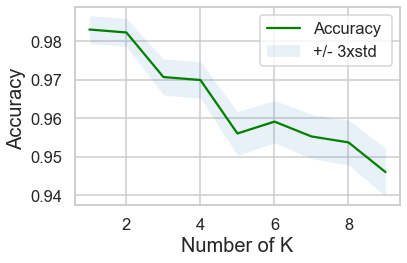

In [95]:
plt.plot(range(1,Ks),mean_acc_test,'g')
plt.fill_between(range(1,Ks),mean_acc_test - 1 * std_acc,mean_acc_test + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [96]:
print( "The best accuracy value is", np.round(mean_acc_test.max(),3), "with k=", mean_acc_test.argmax()+1) 

The best accuracy value is 0.983 with k= 1


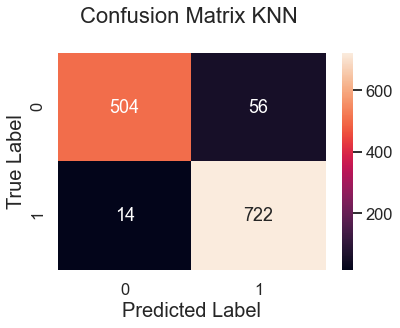

In [97]:
# use the best k
k = 6

# predict  
yhat = neigh.predict(xr_test)

# matrix confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(yr_test,yhat)
predict_list.append(cm_knn.item(0)+cm_knn.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_knn, annot = True, fmt='.0f', ax = ax)
plt.title('Confusion Matrix KNN ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [98]:
from sklearn.metrics import classification_report

print(classification_report(yr_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       560
           1       0.93      0.98      0.95       736

    accuracy                           0.95      1296
   macro avg       0.95      0.94      0.94      1296
weighted avg       0.95      0.95      0.95      1296



# Decision tree


In [99]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)

model_score_r = model_dt_smote.score(xr_test, yr_test)

accuracy_list_s.append(model_dt_smote.score(xr_test,yr_test))
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9220679012345679
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       560
           1       0.91      0.96      0.93       736

    accuracy                           0.92      1296
   macro avg       0.93      0.92      0.92      1296
weighted avg       0.92      0.92      0.92      1296



# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(xr_train,yr_train)

# predict
yhat_test = LR.predict(xr_test)

In [101]:
# probability of the predict
yhat_prob = LR.predict_proba(xr_test)
yhat_prob
accuracy_list_s.append(LR.score(xr_test,yr_test))
algorithm_s.append("Logistic Regression")

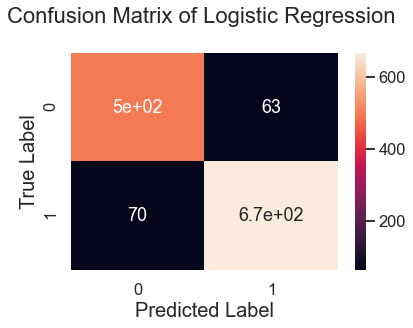

In [102]:
# matrix confusion
cm_logreg = confusion_matrix(yr_test,yhat_test)
predict_list.append(cm_logreg.item(0)+cm_logreg.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_logreg, annot = True)
plt.title('Confusion Matrix of Logistic Regression ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [103]:
from sklearn.metrics import accuracy_score

mylist = []
ac_train = accuracy_score(yr_train, yhat_train)
ac_test = accuracy_score(yr_test, yhat_test)
mylist.append(ac_train)
mylist.append(ac_test)
print('Accuracy training:', np.round(ac_train,3))
print('Accuracy testing:', np.round(ac_test,3))

Accuracy training: 0.956
Accuracy testing: 0.897


In [104]:
print(classification_report(yr_test, yhat_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       560
           1       0.91      0.90      0.91       736

    accuracy                           0.90      1296
   macro avg       0.90      0.90      0.90      1296
weighted avg       0.90      0.90      0.90      1296



## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(xr_train,yr_train)
y_pred=model_rf.predict(xr_test)
model_rf.score(xr_test,yr_test)
accuracy_list_s.append(model_rf.score(xr_test,yr_test))

algorithm_s.append('Random forest')
print(classification_report(yr_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.92      0.89      0.90       560
           1       0.92      0.94      0.93       736

    accuracy                           0.92      1296
   macro avg       0.92      0.91      0.91      1296
weighted avg       0.92      0.92      0.92      1296



## Naive bayes

test accuracy:  0.8873456790123457


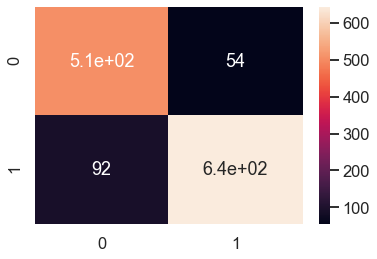

In [107]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test accuracy: ",nb.score(xr_test,yr_test))
accuracy_list_s.append(nb.score(xr_test,yr_test))
algorithm_s.append("Naive Bayes ")

cm_NaB = confusion_matrix(yr_test,nb.predict(xr_test))
predict_list.append(cm_NaB.item(0)+cm_NaB.item(2))
sns.heatmap(cm_NaB,annot=True)
plt.show()

KeyError: 'K N N'

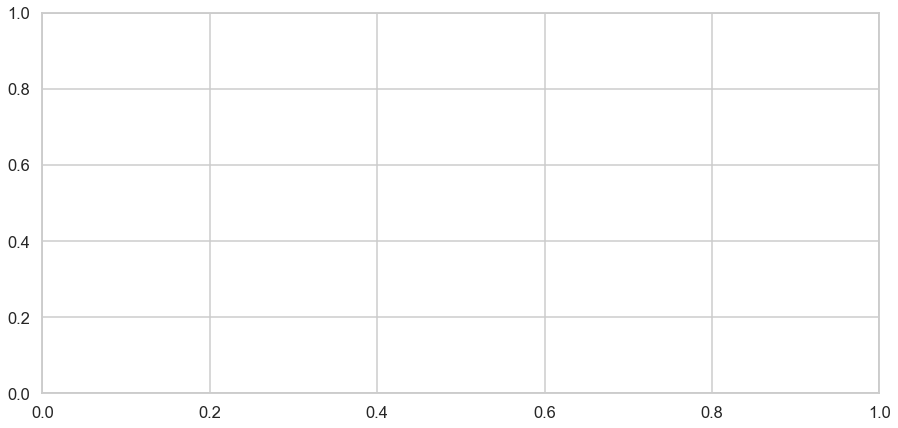

In [108]:
#Classifier Accuracy
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy_list_s,y=algorithm_s,palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')

plt.show()